In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
number_of_mice=combined_data['Mouse ID'].nunique()
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [5]:
combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint']) == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Getting a clean dataframe without the duplicate mouse
mice_df = combined_data

# mice_df.drop_duplicates(['Mouse ID', 'Timepoint'], inplace=True) 
mice_df=mice_df[mice_df['Mouse ID']!='g989']
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
total_count=mice_df['Mouse ID'].nunique()
total_count

248

## Summary Statistics

In [8]:
mice_df =mice_df.set_index("Drug Regimen")
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [10]:
# calculating the mean for each regimen
mean_t_volume=mice_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
mean_t_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# calculating the median for each regimen
median_t_volume=mice_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
median_t_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# calculating the variance for each regimen
var_t_volume=mice_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
var_t_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# calculating the standard deviation for each regimen
std_t_volume=mice_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
std_t_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# calculating the SEM for each regimen
sem_t_volume=mice_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
sem_t_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Assemble the resulting series into a single summary dataframe.

In [16]:
results_df=pd.DataFrame({'Mean Tumor Volume':mean_t_volume,
                       'Median Tumor Volume': median_t_volume,
                        'Tumor Volume Variance': var_t_volume,
                        'Tumor Volume Std. Dev.': std_t_volume,
                        'Tumor Volume Std. Err':sem_t_volume})
results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [18]:
new_df=mice_df.groupby("Drug Regimen")
summary_stats = new_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:
# reseting the index 
new_mice=mice_df.reset_index()
new_mice

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,0,45.000000,0,Female,9,22
1,Ketapril,f932,0,45.000000,0,Male,15,29
2,Ketapril,g107,0,45.000000,0,Female,2,29
3,Ketapril,a457,0,45.000000,0,Female,11,30
4,Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...,...
1875,Capomulin,r944,45,41.581521,2,Male,12,25
1876,Capomulin,u364,45,31.023923,3,Male,18,17
1877,Ceftamin,p438,45,61.433892,1,Female,11,26
1878,Placebo,x773,45,58.634971,4,Female,21,30


In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_df=new_mice.groupby("Drug Regimen")

In [21]:
# checking the amount of measurements for each regimen
counter=bar_df["Drug Regimen"].count().sort_values(ascending=False)
counter

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Total Number of Measurements')

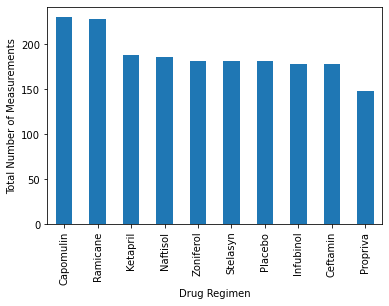

In [22]:
bar_chart=counter.plot(kind='bar')
bar_chart.set_ylabel("Total Number of Measurements")

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

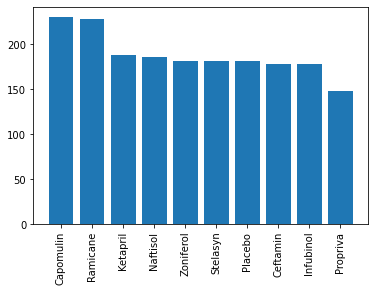

In [24]:
count=new_mice['Drug Regimen'].value_counts()
count
plt.bar(count.index.values, count.values)
plt.xticks(rotation=90)
plt.show()

In [25]:
# The bar chart shows that most of the measurements were done with Capomulin and the Ramicane 
# and respectively at least amount of measurements were done with Propriva.

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df=new_mice.groupby("Sex")
pie_df
counter=pie_df["Sex"].count().sort_values(ascending=False)
counter

Sex
Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

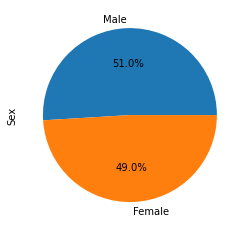

In [27]:
counter.plot(kind='pie', y='Sex', autopct='%1.1f%%')

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [29]:
gender_count=new_mice['Sex'].value_counts()
gender_count

Male      958
Female    922
Name: Sex, dtype: int64

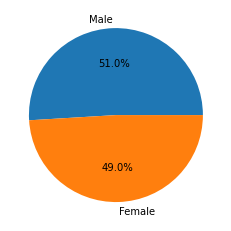

In [30]:
plt.pie(gender_count.values, labels=gender_count.index.values, autopct="%1.1f%%")
plt.show()

In [31]:
# The pie chart shows that from the amount of the mice used in this experiment the male mice were only 2% more
# which is not significant and the followed treatment results won't deffer based on the gender of the mice.

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_time=new_mice.groupby(['Mouse ID']).max()["Timepoint"]
greatest_time=greatest_time.reset_index()
greatest_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df=greatest_time.merge(new_mice, on=["Mouse ID", "Timepoint"], how="left")

In [33]:
final_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,45,Infubinol,67.973419,2,Female,20,23
1,a251,45,Infubinol,65.525743,1,Female,21,25
2,a262,45,Placebo,70.717621,4,Female,17,29
3,a275,45,Ceftamin,62.999356,3,Female,20,28
4,a366,30,Stelasyn,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,48.710661,0,Female,12,26
244,z578,45,Ramicane,30.638696,0,Male,11,16
245,z581,45,Infubinol,62.754451,3,Female,24,25
246,z795,45,Naftisol,65.741070,3,Female,13,29


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    final_tumor=final_df.loc[final_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor)
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    #  print the potential outliers
    print(f"{drug}'s potential outliers:",outlier)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

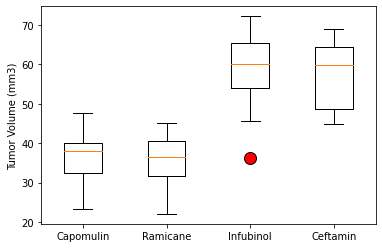

In [36]:
colors=dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_vol, labels=drugs, flierprops=colors)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [37]:
# From the boxplot it can be concluded that the Infbinol is the only one with potentitial outliers.

## Line and Scatter Plots

In [38]:
# making a dataframe for specific mouse
l509_df=combined_data[(combined_data['Mouse ID']) == 'l509']
l509_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

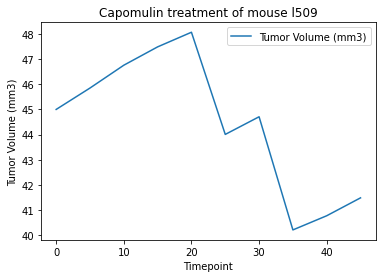

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plt = l509_df.plot.line(x='Timepoint' ,y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

In [40]:
# This lineplot shows how the tumor volume is changing over time when is treated with Capomulin. 
# It could be concluded that treating a mouse with Capommulin definitely brings the size of the tumor down.

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [42]:
capomulin_df=new_mice[(new_mice['Drug Regimen'] == "Capomulin")]
capomulin_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,0,45.000000,0,Female,9,22
224,Capomulin,j246,0,45.000000,0,Female,21,21
225,Capomulin,r554,0,45.000000,0,Female,8,17
226,Capomulin,s185,0,45.000000,0,Female,3,17
227,Capomulin,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...,...
1841,Capomulin,s710,45,40.728578,1,Female,1,23
1846,Capomulin,j119,45,38.125164,1,Female,7,23
1865,Capomulin,i557,45,47.685963,1,Female,1,24
1875,Capomulin,r944,45,41.581521,2,Male,12,25


In [43]:
capomulin_df=capomulin_df.groupby(['Mouse ID']).mean()

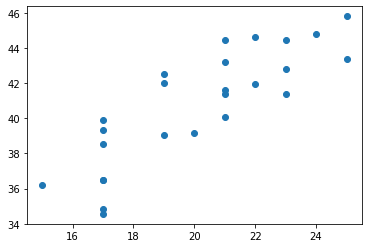

In [44]:
plt.scatter(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation coefficient is 0.84


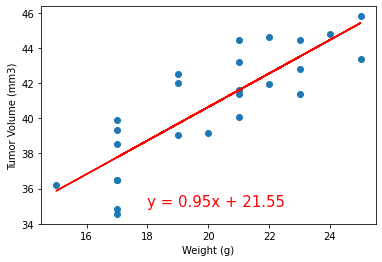

In [46]:
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,35),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()

In [47]:
# With correlation coefficient at 0.84 there is a clear linear relation between the weight of a mouse 
# and the size of the tumor in cubic millimeters. It is a positive correlation which means that 
# when one of the variables is increasing the other one is going up as well.